# 다항 회귀(Polynomial Regression)

단순 선형 회귀
- 독립 변수 1개, 종속 변수 1개인 선형 회귀  
- 독립 변수(피처)와 종속 변수(타깃)의 관계가 일차 방정식 형태
-  $ y = w_0 + w_1X$

다중선형회귀 
- 독립 변수(피처)가 2개 이상인 선형 회귀   
- $ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
- 독립변수(festure)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
- 직선으로 표현


다항 회귀 
- 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식 
-  $ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $
- 다항회귀도 선형회귀로 간주
    - 이유 
        - 선형회귀를 단순히 직선이나 곡선과 같은 모양으로 정의한 것이 아니라  
        - 선형/비선형 구분은 회귀 계수가 선형/비선형 여부에 따른 것이지  
          독립변수의 선형/비선형 여부와는 무관하기 때문
       - 즉, 새로운 변수 Z를 $ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $ 라고 하면  
       - $ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $ 로 표현 가능   
- 피처 X에 대해 타깃 Y 값의 관계를 단순 선형회귀 직선형으로 표현한 것보다
- 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높음

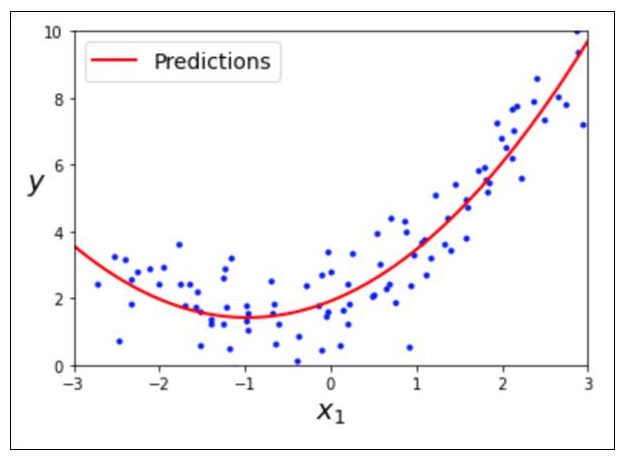

### 사이킷런에서 다항 회귀 사용 
- 사이킷런에서는 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음  
- 대신 비선형 함수를 선형 모델에 적용시키는 방법을 사용해서 구현  
- PolynomialFeatures 클래스를 사용해서 피처를 다항식 피처로 변환 

#### PolynomialFeatures 클래스
- PolynomialFeatures 클래스를 통해서 피처를 다항식 피처로 변환
- PolynomialFeatures(degree=2) : 2차 다항식
- fit()/transform() 메서드를 사용해서 변환 작업 수행
    - 또는 fit_transform() 메소드 사용  

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### PolynomialFeatures 클래스로 다항식 변환 예제 
- 단항값을 2차 다항값으로 변환하는 예
- 단항값 [$ x_1, x_2 $  ]을 2차 다항값 [$ 1, x_{1} , x_{2} , x_{1}^2, x_{1}x_{2} , x_{2}^2  $]으로 변환하는 예 

In [2]:
import numpy as np

X = np.array([[3, 4]])
X

array([[3, 4]])

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly

array([[ 1.,  3.,  4.,  9., 12., 16.]])

In [4]:
# 3차의 경우도 예상대로
Y = np.array([[2, 3]])
poly_features_3 = PolynomialFeatures(degree=3)
Y_poly = poly_features_3.fit_transform(Y)
Y_poly

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

### 다항 회귀 구현 

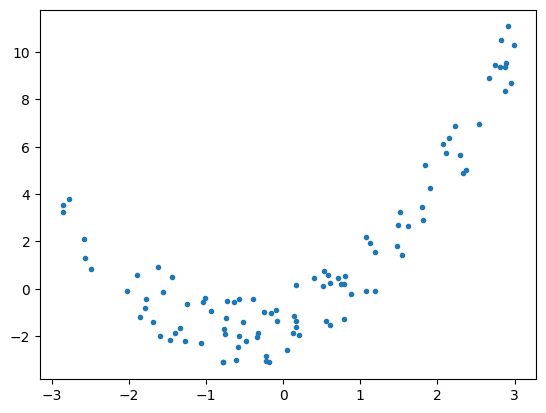

In [5]:
# 랜덤 데이터 생성
import matplotlib.pyplot as plt
n = 100
X = 6*np.random.rand(n, 1) - 3
Y = X**2 + X - 3*np.random.rand(n, 1)

plt.plot(X, Y, '.')
plt.show()

In [6]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# include_bias=False : 앞에 있는 constant인 1을 없앤다
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[ 2.82843666,  8.00005395],
       [ 1.18672482,  1.4083158 ],
       [-0.74229109,  0.55099606]])

LinearRegression()

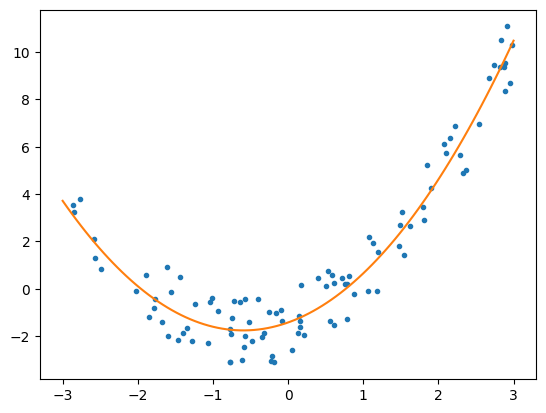

In [7]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_poly, Y)
X_axis = np.linspace(-3, 3, 100).reshape(-1, 1)
Y_axis = lr_reg.predict(poly_features.fit_transform(X_axis))
plt.plot(X, Y, '.', X_axis, Y_axis)
plt.show()

In [8]:
X_axis[:3]

array([[-3.        ],
       [-2.93939394],
       [-2.87878788]])

## 다항 회귀를 이용한 보스턴 주택가격 예측

In [9]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [10]:

boston_df = df_pop = pd.read_csv('../data/boston_dataset.csv', index_col=0) 
boston_df.head()
boston_df.tail()

print('보스턴 주택 가격 데이터셋 크기 : ', boston_df.shape)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


보스턴 주택 가격 데이터셋 크기 :  (506, 14)


### 데이터 준비

In [11]:
# 타깃값 데이터 셋 만들기
y_target = boston_df['PRICE']

# 피처값 데이터 셋 만들기
# 타깃 제외한 나머지 칼럼들
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [12]:
X_data.shape
y_target.shape

(506, 13)

(506,)

In [13]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_data , 
                                                       y_target, 
                                                       test_size=0.3, 
                                                       random_state=156)

###  PolynomialFeatures 변환과 LinearRegression을 순차적으로 결합 (3가지)
- Pipeline 이용   
(1) degree=2  
(2) degree=2, include_bias=False  
(3) degree=3, include_bias=False

### 사이킷런 Pipeline
- 피처 변환과 선형 회귀 적용을 별도로 하지 않고
- 다항 회기를 한 번에 구현하기 위한 방법  
- Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from evaluator import get_reg_eval

In [15]:
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                    ('linear', LinearRegression())])
p_model.fit(X_train, y_train)
y_pred = p_model.predict(X_test)
get_reg_eval(y_test, y_pred)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

MSE : 15.555752
RMSE : 3.944078
R2 : 0.781665


In [16]:
# 2차 다항식의 항 갯수
# 인수가 13개이므로 14개에서 중복조합 갯수를 계산한다
# include_bias=False때문에 상수항 하나 제거
len(p_model.named_steps['linear'].coef_)
# 중복조합 : (14 H 2) - 1 = 104

104

In [17]:
# degree=3도 해보자
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                    ('linear', LinearRegression())])
p_model.fit(X_train, y_train)
y_pred = p_model.predict(X_test)
get_reg_eval(y_test, y_pred)

# 엄청난 과적합

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])

MSE : 79625.592835
RMSE : 282.180072
R2 : -1116.597918


In [18]:
# 3차 다항식의 항 갯수
# 위와 동일하다
len(p_model.named_steps['linear'].coef_)
# 중복조합 : (14 H 3) - 1 = 559

559

### Polynomial Regression을 이용한 Underfitting, Overfitting 이해

다항 회귀를 이용한 과속적합 및 과(대)적합 이행
- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있지만
- 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춰진 학습이 이루어져 과적합 문제 발생